In [2]:
from openpyxl import load_workbook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.plotly as py
import seaborn as sns
import jinja2
from bokeh.io import output_notebook
import bokeh.palettes
from bokeh.plotting import figure, show, output_file
from bokeh.models import HoverTool, ColumnDataSource, Range1d, LabelSet, Label
from collections import OrderedDict
from bokeh.sampledata.periodic_table import elements
from bokeh.resources import CDN
from bokeh.embed import file_html
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
import scipy

C:\Users\diego\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [3]:
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)


wb = load_workbook(r'C:\Users\diego\Downloads\worldcup.xlsx')

#['Hoja1', 'Mundial1994-2014']

work_sheet = wb['Mundial1994-2014']


In [4]:
df = pd.DataFrame(work_sheet.values)

df.columns = ['Team1','Goal1','Goal2','Team2','Year','Stage','Goal_Dif','Team1_Res','Team2_Res',
              'Rank1','Rank2','Dif_Rank','Value1','Value2','Value_Dif','Age1','Age2','Age_Dif','Color1','Color2']
df = df.drop(df.index[[0]])
df['Match_Info'] = df['Team1'] + ' '+ df['Goal1'].astype(str)+'-'+df['Goal2'].astype(str)+ ' '+ df['Team2']
df['y'] = np.where(df['Team1_Res'] == -1, 0, 1)


df_win_lose = df[(df['Team1_Res'] > 0) | (df['Team1_Res'] < 0)]
df_value = df[df['Year']>= 2010]

df_value_win_lose = df_value[(df['Team1_Res'] > 0) | (df_value['Team1_Res'] < 0)]

C:\Users\diego\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



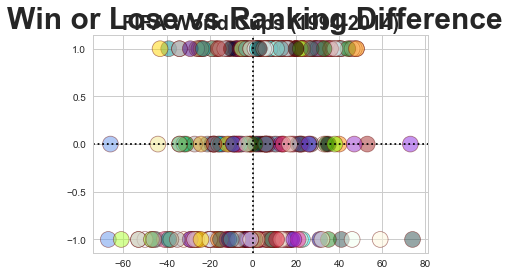

In [5]:
#Gráfica comparativa Goal_Dif , Dif_Rank

df_Team1Res_DifRank = df[['Team1_Res','Dif_Rank','Team1','Color1']]
df_GoalDif_DifRank = df[['Goal_Dif','Dif_Rank','Team1','Color1']]


colors1 = list(df['Color1'])


plt.scatter(df_Team1Res_DifRank['Dif_Rank'],df_Team1Res_DifRank['Team1_Res'],
                     s=250, alpha=0.5, c=colors1,edgecolor='#6b0c08',linewidth = 0.75)
plt.axvline(0, color='black',linestyle=':')
plt.axhline(0, color='black',linestyle=':')
plt.suptitle('Win or Lose vs Ranking Difference', weight='bold', fontsize=30)
plt.title('FIFA World Cups (1994-2014)', weight='bold', fontsize=20)
plt.show()


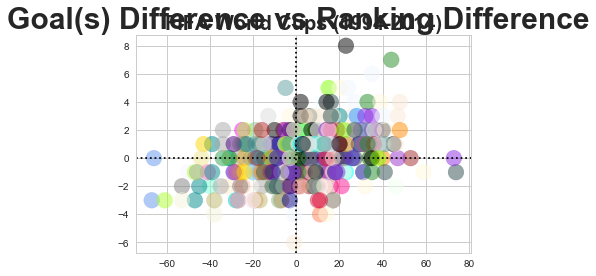

In [6]:
plt.scatter(x='Dif_Rank',y='Goal_Dif', data=df_GoalDif_DifRank, marker='o', c=colors1,
            s=250, alpha=0.5)
plt.axvline(0, color='black',linestyle=':')
plt.axhline(0, color='black',linestyle=':')
plt.suptitle('Goal(s) Difference vs Ranking Difference', weight='bold', fontsize=30)
plt.title('FIFA World Cups (1994-2014)', weight='bold', fontsize=20)
plt.show()

In [8]:
#Grafico1

tools = 'pan, wheel_zoom, box_zoom, reset, save'.split(',')
hover = HoverTool(tooltips=[
     ("Team", "@Team1"),
     ("Rank Difference:", '@Dif_Rank'),
     ("Team Result", "@Team1_Res"),
    ('Year', '@Year'),
    ('Stage:', '@Stage'),
    ('Match:', '@Match_Info')
])

tools.append(hover)

p = figure(plot_width = 1300, plot_height = 1100, title='Win(1)-Draw(0)-Lose(-1) vs Ranking Difference',
           x_range=Range1d(-100, 100),y_range = Range1d(-1.5,1.5), tools=tools)

source= ColumnDataSource(df)

p.title.text_font_size = '19pt'
p.title_location = 'above'
p.scatter(x='Dif_Rank', y='Team1_Res', size=28,color='Color1' , source=source, fill_alpha=0.6)
p.xaxis[0].axis_label = 'Ranking Difference'
p.xaxis[0].axis_label_text_font_size = '15pt'
p.yaxis[0].axis_label = 'Win(1)-Draw(0)-Lose(-1)'
p.yaxis[0].axis_label_text_font_size = '15pt'
#labels = LabelSet(x='Dif_Rank', y='Team1_Res', text='Team1', level='glyph',
#              x_offset=8, y_offset=8, source=source, render_mode='canvas', text_align ='center', text_font_size='10pt')

#p.add_layout(labels)

output_file("label.html", title="label.py example")

show(p)

In [9]:
#Grafico2

tools = 'pan, wheel_zoom, box_zoom, reset, save'.split(',')
hover = HoverTool(tooltips=[
     ("Team:", "@Team1"),
     ("Rank Difference:", '@Dif_Rank'),
     ("Goal(s) Difference:", "@Goal_Dif"),
    ('Year:', '@Year'),
    ('Stage:', '@Stage'),
    ('Match:', '@Match_Info')
])

tools.append(hover)

p = figure(plot_width = 1000, plot_height = 900, title='Goal(s) Difference vs Ranking Difference',
           x_range=Range1d(-100, 100),y_range = Range1d(-10,10), tools=tools)

source= ColumnDataSource(df)

p.title.text_font_size = '19pt'
p.title_location = 'above'
p.scatter(x='Dif_Rank', y='Goal_Dif', size=28,color='Color1' , source=source, fill_alpha=0.6)
p.xaxis[0].axis_label = 'Ranking Difference'
p.xaxis[0].axis_label_text_font_size = '15pt'
p.yaxis[0].axis_label = 'Goal(s) Difference'
p.yaxis[0].axis_label_text_font_size = '15pt'
#labels = LabelSet(x='Dif_Rank', y='Team1_Res', text='Team1', level='glyph',
#              x_offset=8, y_offset=8, source=source, render_mode='canvas', text_align ='center', text_font_size='10pt')


output_file("label2.html", title="label2.py example")

show(p)

In [15]:
#Grafico3

tools = 'pan, wheel_zoom, box_zoom, reset, save'.split(',')
hover = HoverTool(tooltips=[
     ("Team:", "@Team1"),
     ("Market Value Difference:", '@Value_Dif'),
     ("Goal(s) Difference:", "@Goal_Dif"),
    ('Year:', '@Year'),
    ('Stage:', '@Stage'),
    ('Match:', '@Match_Info')
])

tools.append(hover)

p = figure(plot_width = 1000, plot_height = 900, title='Goal(s) Difference vs Team Market Value Difference',
           y_range = Range1d(-10,10), tools=tools)

source= ColumnDataSource(df_value)

p.title.text_font_size = '19pt'
p.title_location = 'above'
p.scatter(x='Value_Dif', y='Goal_Dif', size=28,color='Color1' , source=source, fill_alpha=0.6)
p.xaxis[0].axis_label = 'Team Market Value Difference (Hundred Million USD)'
p.xaxis[0].axis_label_text_font_size = '15pt'
p.yaxis[0].axis_label = 'Goal(s) Difference'
p.yaxis[0].axis_label_text_font_size = '15pt'
#labels = LabelSet(x='Dif_Rank', y='Team1_Res', text='Team1', level='glyph',
#             x_offset=8, y_offset=8, source=source, render_mode='canvas', text_align ='center', text_font_size='10pt')


output_file("label3.html", title="label3.py example")

show(p)


In [10]:
#Grafico4

tools = 'pan, wheel_zoom, box_zoom, reset, save'.split(',')
hover = HoverTool(tooltips=[
     ("Team:", "@Team1"),
     ("Market Value Difference:", '@Value_Dif'),
     ("Team Result:", "@Team1_Res"),
     ('Year:','@Year'),
     ('Stage:', '@Stage'),
     ('Match:','@Match_Info')])

tools.append(hover)

p = figure(plot_width = 1000, plot_height = 900, title='Win(1)-Draw(0)-Lose(-1) vs Team Market Value Difference',
           y_range = Range1d(-1.5,1.5), tools=tools)

source= ColumnDataSource(df_value)

p.title.text_font_size = '19pt'
p.title_location = 'above'
p.scatter(x='Value_Dif', y='Team1_Res', size=28,color='Color1' , source=source, fill_alpha=0.6)
p.xaxis[0].axis_label = 'Team Market Value Difference (Hundred Million USD)'
p.xaxis[0].axis_label_text_font_size = '15pt'
p.yaxis[0].axis_label = 'Win(1)-Draw(0)-Lose(-1)'
p.yaxis[0].axis_label_text_font_size = '15pt'
#labels = LabelSet(x='Dif_Rank', y='Team1_Res', text='Team1', level='glyph',
#              x_offset=8, y_offset=8, source=source, render_mode='canvas', text_align ='center', text_font_size='10pt')


output_file("label4.html",mode='inline',  title="label4.py example")

show(p)

In [14]:
#Grafico5

tools = 'pan, wheel_zoom, box_zoom, reset, save'.split(',')
hover = HoverTool(tooltips=[
     ("Team", "@Team1"),
     ("Rank Difference:", '@Dif_Rank'),
     ("Team Result", "@Team1_Res"),
    ('Year', '@Year'),
    ('Stage:', '@Stage'),
    ('Match:', '@Match_Info')
])

tools.append(hover)

p = figure(plot_width = 1000, plot_height = 900, title='Win(1)-Lose(-1) vs Ranking Difference',
           x_range=Range1d(-100, 100),y_range = Range1d(-1.5,1.5), tools=tools)

source = ColumnDataSource(df_value_win_lose)

p.title.text_font_size = '19pt'
p.title_location = 'above'
p.scatter(x='Dif_Rank', y='Team1_Res', size=28,color='Color1' , source=source, fill_alpha=0.6)
p.xaxis[0].axis_label = 'Ranking Difference'
p.xaxis[0].axis_label_text_font_size = '15pt'
p.yaxis[0].axis_label = 'Win(1)-Lose(-1)'
p.yaxis[0].axis_label_text_font_size = '15pt'
#labels = LabelSet(x='Dif_Rank', y='Team1_Res', text='Team1', level='glyph',
#              x_offset=8, y_offset=8, source=source, render_mode='canvas', text_align ='center', text_font_size='10pt')


#p.add_layout(labels)

output_file("label5.html", title="label5.py example")

show(p)


In [11]:
#Grafico6

tools = 'pan, wheel_zoom, box_zoom, reset, save'.split(',')
hover = HoverTool(tooltips=[
     ("Team", "@Team1"),
    ("Market Value Difference:", '@Value_Dif'),
     ("Team Result", "@Team1_Res"),
    ('Year', '@Year'),
    ('Stage:', '@Stage'),
    ('Match:', '@Match_Info')
])

tools.append(hover)

p = figure(plot_width = 1000, plot_height = 900, title='Win(1)-Lose(-1) vs Team Market Value Difference',
           y_range = Range1d(-1.5,1.5), tools=tools)

source = ColumnDataSource(df_value_win_lose)

p.title.text_font_size = '19pt'
p.title_location = 'above'
p.scatter(x='Value_Dif', y='Team1_Res', size=28,color='Color1' , source=source, fill_alpha=0.6)
p.xaxis[0].axis_label = 'Team Market Value Difference (Hundred Million USD)'
p.xaxis[0].axis_label_text_font_size = '15pt'
p.yaxis[0].axis_label = 'Win(1)-Lose(-1)'
p.yaxis[0].axis_label_text_font_size = '15pt'
#labels = LabelSet(x='Dif_Rank', y='Team1_Res', text='Team1', level='glyph',
#             x_offset=8, y_offset=8, source=source, render_mode='canvas', text_align ='center', text_font_size='10pt')





#p.add_layout(labels)

output_file("label6.html", title="label6.py example")

show(p)


In [12]:
#Grafico7

tools = 'pan, wheel_zoom, box_zoom, reset, save'.split(',')
hover = HoverTool(tooltips=[
     ("Team", "@Team1"),
    ("Market Value Difference:", '@Value_Dif'),
     ("Team Result", "@Team1_Res"),
    ('Year', '@Year'),
    ('Stage:', '@Stage'),
    ('Match:', '@Match_Info')
])

tools.append(hover)

p = figure(plot_width = 1000, plot_height = 900, title='Goal(s) Difference vs Team Market Value Difference',
           y_range = Range1d(-10,10), tools=tools)

source = ColumnDataSource(df_value_win_lose)

p.title.text_font_size = '19pt'
p.title_location = 'above'
p.scatter(x='Value_Dif', y='Goal_Dif', size=28,color='Color1' , source=source, fill_alpha=0.6)
p.xaxis[0].axis_label = 'Team Market Value Difference (Hundred Million USD)'
p.xaxis[0].axis_label_text_font_size = '15pt'
p.yaxis[0].axis_label = 'Goal(s) Difference'
p.yaxis[0].axis_label_text_font_size = '15pt'
#labels = LabelSet(x='Dif_Rank', y='Team1_Res', text='Team1', level='glyph',
#              x_offset=8, y_offset=8, source=source, render_mode='canvas', text_align ='center', text_font_size='10pt')





#p.add_layout(labels)

output_file("label7.html", title="label7.py example")

show(p)


In [13]:
#Grafico8

tools = 'pan, wheel_zoom, box_zoom, reset, save'.split(',')
hover = HoverTool(tooltips=[
     ("Team", "@Team1"),
    ("Market Value Difference:", '@Value_Dif'),
     ("Team Result", "@Team1_Res"),
    ('Year', '@Year'),
    ('Stage:', '@Stage'),
    ('Match:', '@Match_Info')
])

tools.append(hover)

p = figure(plot_width = 1000, plot_height = 900, title='Goal(s) Difference vs Ranking Difference',
           y_range = Range1d(-10,10), tools=tools)

source = ColumnDataSource(df_value_win_lose)

p.title.text_font_size = '19pt'
p.title_location = 'above'
p.scatter(x='Dif_Rank', y='Goal_Dif', size=28,color='Color1' , source=source, fill_alpha=0.6)
p.xaxis[0].axis_label = 'Ranking Difference'
p.xaxis[0].axis_label_text_font_size = '15pt'
p.yaxis[0].axis_label = 'Goal(s Difference)'
p.yaxis[0].axis_label_text_font_size = '15pt'
#labels = LabelSet(x='Dif_Rank', y='Team1_Res', text='Team1', level='glyph',
#             x_offset=8, y_offset=8, source=source, render_mode='canvas', text_align ='center', text_font_size='10pt')

#p.add_layout(labels)

output_file("label8.html", title="label8.py example")

show(p)


In [16]:
#Linear Regression World Cup-Transfer Market Value

#Predict variable desired target 1 means win, -1 means lose

#Data Exploration


train, test = train_test_split(df_value_win_lose, test_size=0.20, random_state=99)

X_train = train[['Value_Dif']]
y_train = train[['y']]

X_test = test[['Value_Dif']]
y_test = test[['y']]

#Usar si son más de una variable independiente
#data_final = df_value_win_lose[['y','Value_Dif']]
#X = data_final['Value_Dif']
#y = data_final['y']


#Choose Data- tienen que ser más de 1 variable independiente
#logreg = LogisticRegression()

#rfe = RFE(logreg, 1)
#rfe = rfe.fit(data_final['Value_Dif'], data_final['y'])

#Split Data Set
#split = int(0.7*len(data_final))

#X_train, X_test, y_train, y_test = X[:split],X[split:],y[:split], y[split:]

#Fit Model- mas de 1 variable
#model = LogisticRegression()
#model = model.fit(X_train, y_train)
model = LogisticRegression()
model = model.fit(X_train, y_train)
#Predict Probabilities
probability = model.predict_proba(X_test)
print(probability)

#Predict class labels
predicted = model.predict(X_test)
print(len(predicted))
print(len(y_test))

#Evaluate the model
    #Confusion Matrix
print(metrics.confusion_matrix(y_test,predicted))

print(metrics.classification_report(y_test, predicted))

#Model Accuracy
print(model.score(X_test,y_test))

#Cross Validation
Value_Dif = df_value_win_lose['Value_Dif']
Value_Dif = np.array(Value_Dif).reshape(-1,1)

cross_val = cross_val_score(LogisticRegression(), Value_Dif, df_value_win_lose['y'],
                            scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())

[[0.57947171 0.42052829]
 [0.21710208 0.78289792]
 [0.3771423  0.6228577 ]
 [0.31314871 0.68685129]
 [0.66201459 0.33798541]
 [0.19145558 0.80854442]
 [0.23390157 0.76609843]
 [0.77414109 0.22585891]
 [0.40991326 0.59008674]
 [0.70636746 0.29363254]
 [0.08758699 0.91241301]
 [0.40386222 0.59613778]
 [0.6205644  0.3794356 ]
 [0.45878582 0.54121418]
 [0.89264119 0.10735881]
 [0.53412901 0.46587099]
 [0.33097288 0.66902712]
 [0.28595816 0.71404184]
 [0.60041285 0.39958715]
 [0.18656114 0.81343886]
 [0.23409364 0.76590636]]
21
21
[[ 6  3]
 [ 2 10]]
             precision    recall  f1-score   support

          0       0.75      0.67      0.71         9
          1       0.77      0.83      0.80        12

avg / total       0.76      0.76      0.76        21

0.7619047619047619
[0.63636364 0.45454545 0.63636364 0.72727273 0.81818182 0.54545455
 0.6        0.77777778 0.77777778 1.        ]
0.6973737373737374


C:\Users\diego\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



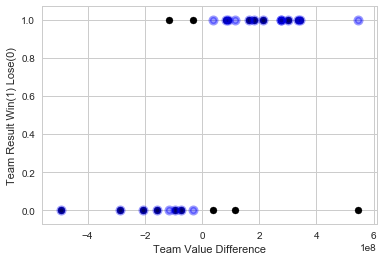

In [17]:
#Create Strategy Using the model

plt.scatter(X_test, y_test,  color='black')
plt.scatter(X_test, predicted, color='blue', linewidth=3, alpha=0.4)
plt.xlabel("Team Value Difference")
plt.ylabel("Team Result Win(1) Lose(0)")
plt.show()

[[0.25983425 0.74016575]
 [0.7159766  0.2840234 ]
 [0.12563353 0.87436647]
 [0.21530189 0.78469811]
 [0.45404667 0.54595333]
 [0.35078695 0.64921305]
 [0.22055167 0.77944833]
 [0.2258926  0.7741074 ]
 [0.15528951 0.84471049]
 [0.19521531 0.80478469]
 [0.38661472 0.61338528]
 [0.19521531 0.80478469]
 [0.2258926  0.7741074 ]
 [0.42371352 0.57628648]
 [0.14737874 0.85262126]
 [0.10096409 0.89903591]
 [0.37211093 0.62788907]
 [0.43882295 0.56117705]
 [0.51551854 0.48448146]
 [0.67694559 0.32305441]
 [0.27185659 0.72814341]
 [0.12563353 0.87436647]
 [0.43882295 0.56117705]
 [0.69681578 0.30318422]
 [0.16780106 0.83219894]
 [0.18110453 0.81889547]
 [0.14737874 0.85262126]
 [0.15937318 0.84062682]
 [0.25395408 0.74604592]
 [0.5840266  0.4159734 ]
 [0.24816237 0.75183763]
 [0.41621015 0.58378985]
 [0.33688902 0.66311098]
 [0.37933587 0.62066413]
 [0.20507618 0.79492382]
 [0.47703538 0.52296462]
 [0.5001218  0.4998782 ]
 [0.33688902 0.66311098]
 [0.35783382 0.64216618]
 [0.2842216  0.7157784 ]


C:\Users\diego\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



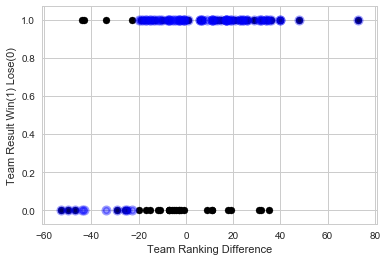

In [18]:
#Segundo Modelo
train, test = train_test_split(df, test_size=0.20, random_state=99)

X_train = train[['Dif_Rank']]
y_train = train[['y']]

X_test = test[['Dif_Rank']]
y_test = test[['y']]

#Polynomial and Ridge model alternative en caso de que no sea Logistic Regression
#pol = make_pipeline(PolynomialFeatures(6), Ridge())
#pol.fit(X_train,y_train)


model = LogisticRegression()
model = model.fit(X_train, y_train)
#Predict Probabilities
probability = model.predict_proba(X_test)
print(probability)

#Predict class labels
predicted = model.predict(X_test)
print(len(predicted))
print(len(y_test))

#Evaluate the model
    #Confusion Matrix
print(metrics.confusion_matrix(y_test,predicted))

print(metrics.classification_report(y_test, predicted))

#Model Accuracy
print(model.score(X_test, y_test))

#Cross Validation
Dif_Rank = df_value_win_lose['Dif_Rank']
Dif_Rank = np.array(Dif_Rank).reshape(-1,1)

cross_val = cross_val_score(LogisticRegression(), Dif_Rank, df_value_win_lose['y'],
                            scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())

plt.scatter(X_test, y_test,  color='black')
plt.scatter(X_test, predicted, color='blue', linewidth=3, alpha=0.4)
plt.xlabel("Team Ranking Difference")
plt.ylabel("Team Result Win(1) Lose(0)")
plt.show()


In [20]:
#Polynomial Ridge En caso de que no sea Logistic Regression
#y_pol = pol.predict(X_test)
#plt.scatter(X_test, y_test,  color='black')
#plt.scatter(X_test, y_pol,  color='blue')
#plt.xlabel("Team Ranking Difference")
#plt.ylabel("Team Result Win(1) Lose(0)")
#plt.show()


In [21]:
#Tercer Modelo Age-Rank
#Fit Model- mas de 1 variable
#model = LogisticRegression()
#model = model.fit(X_train, y_train)


train, test = train_test_split(df_value_win_lose, test_size=0.20, random_state=99)

X_train = train[['Age_Dif','Dif_Rank']]
y_train = train[['y']]

X_test = test[['Age_Dif','Dif_Rank']]
y_test = test[['y']]

model = LogisticRegression()
model = model.fit(X_train, y_train)
#Predict Probabilities
probability = model.predict_proba(X_test)
print(probability)

#Predict class labels
predicted = model.predict(X_test)
print(len(predicted))
print(len(y_test))

#Evaluate the model
    #Confusion Matrix
print(metrics.confusion_matrix(y_test,predicted))

print(metrics.classification_report(y_test, predicted))

#Model Accuracy
print(model.score(X_test,y_test))

#Cross Validation
Indep_Var = df_value_win_lose[['Dif_Rank','Age_Dif']]

cross_val = cross_val_score(LogisticRegression(), Indep_Var, df_value_win_lose['y'],
                            scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())


[[0.83641041 0.16358959]
 [0.38015027 0.61984973]
 [0.35174158 0.64825842]
 [0.2205888  0.7794112 ]
 [0.83296221 0.16703779]
 [0.13755873 0.86244127]
 [0.4578505  0.5421495 ]
 [0.58367203 0.41632797]
 [0.18251261 0.81748739]
 [0.73095139 0.26904861]
 [0.24000707 0.75999293]
 [0.23182501 0.76817499]
 [0.652026   0.347974  ]
 [0.65324789 0.34675211]
 [0.60818204 0.39181796]
 [0.48370911 0.51629089]
 [0.32281642 0.67718358]
 [0.60182337 0.39817663]
 [0.59413992 0.40586008]
 [0.19161788 0.80838212]
 [0.39211785 0.60788215]]
21
21
[[ 7  2]
 [ 2 10]]
             precision    recall  f1-score   support

          0       0.78      0.78      0.78         9
          1       0.83      0.83      0.83        12

avg / total       0.81      0.81      0.81        21

0.8095238095238095
[0.72727273 0.54545455 0.72727273 0.72727273 0.90909091 0.72727273
 0.6        0.88888889 0.77777778 1.        ]
0.763030303030303


C:\Users\diego\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#Mejorar el modelo

# from sklearn.svm import SVR
#
# regr_more_features = LogisticRegression()
# regr_more_features.fit(X_train, y_train)
# y_pred_more_features = regr_more_features.predict(X_test)
# print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, y_pred_more_features))
# print('Variance score: %.2f' % metrics.r2_score(y_test, y_pred_more_features))
#
# pol_more_features = make_pipeline(PolynomialFeatures(4), Ridge())
# pol_more_features.fit(X_train, y_train)
# y_pol_more_features = pol_more_features.predict(X_test)
# print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, y_pol_more_features))
# print('Variance score: %.2f' % metrics.r2_score(y_test, y_pol_more_features))
#
# svr_rbf_more_features = SVR(kernel='rbf', gamma=1e-3, C=100, epsilon=0.1)
# svr_rbf_more_features.fit(X_train, y_train.values.ravel())
# y_rbf_more_features = svr_rbf_more_features.predict(X_test)
# print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, y_rbf_more_features))
# print('Variance score: %.2f' % metrics.r2_score(y_test, y_rbf_more_features))



#print(test[['Team1','Team2','y', 'Age_Dif', 'Value_Dif', 'Dif_Rank', 'Result_Prediction_RBF','Error_Percentage']].nlargest(4, columns='Error_Percentage'))


In [ ]:
#Modelo Final

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.datasets import make_regression
#Generate DataSet
train, test = train_test_split(df_value_win_lose, test_size=0.20, random_state=99)

X_train = train[['Age_Dif','Dif_Rank']]
y_train = train[['y']]

X_test = test[['Age_Dif','Dif_Rank']]
y_test = test[['y']]

#Fit Final Model
model = LogisticRegression()
model = model.fit(X_train,y_train)

#New instances where we do not want answers

work_sheet2018 = wb['Mundial2018']

data2018 = pd.DataFrame(work_sheet2018.values)

data2018.columns = ['Team1','Team2','Year','Stage','Rank1','Rank2','Dif_Rank','Value1','Value2','Value_Dif','Age1','Age2','Age_Dif']

data2018 = data2018.drop(data2018.index[[0]])

#New Instances which we do not know the answer
Xnew = data2018[['Age_Dif','Dif_Rank']]

#Make Predictions
y_predicted_WC2018 = model.predict(Xnew)
probability2018 = model.predict_proba(Xnew)



#show the inputs and predicted outputs
#writer = pd.ExcelWriter('/Users/juancarlos/ProbabilidadMundial2018.xlsx')
#print(pd.DataFrame(y_predicted_WC2018))
#probability2018 = pd.DataFrame(probability2018)


In [23]:
#probability2018.to_excel(writer,'Sheet1')
#writer.save()


#Calculadora de Probabilidades

Calculadora_Prob = wb['Calculadora2']

df_calculadora = pd.DataFrame(Calculadora_Prob.values)
df_calculadora.columns = ['num','Team1','Team2','Year','Rank1','Rank2','Dif_Rank','Age1','Age2','Age_Dif']

df_calculadora = df_calculadora.drop(df_calculadora.index[[0]])

#New Data to predict
xnew_calc = df_calculadora[['Age_Dif','Dif_Rank']]
y_predict_calc = model.predict(xnew_calc)
prob_calc = model.predict_proba(xnew_calc)

print(y_predict_calc)
print(prob_calc)

# #show the inputs and predicted outputs
# writer = pd.ExcelWriter('/Users/juancarlos/ProbabilidadMundial2018-2.xlsx')
# print(pd.DataFrame(y_predict_calc))
# y_predict_calc= pd.DataFrame(y_predict_calc)
#
# y_predict_calc.to_excel(writer,'Sheet1')
# writer.save()
#
# writer = pd.ExcelWriter('/Users/juancarlos/ProbabilidadMundial2018-1.xlsx')
# print(pd.DataFrame(prob_calc))
# prob_calc= pd.DataFrame(prob_calc)
#
# prob_calc.to_excel(writer,'Sheet1')
# writer.save()

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1
 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1
 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1
 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1
 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0
 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

Predicciones por equipos con su probabilidad: 1=Triunfo, 0=derrota. Lista de probabilidad abajo.
